## High Dimensional Cytometry Data with Python
Methods employed in this notebook for exploratory analysis of high-dimensional single-cell data: 
- Nonlinear dimensionality reduction algorithm using t-SNE (actually using Barnes-Hut t-SNE as data set is quite large, could use t-SNE cascaded with PCA in order to reduce computation time)
- k-means clustering algorithm in hopes that cells with similar phenotypes will be grouped together
- Matplotlib for data visualisation of clusters + plotly for interactive 3d mappings of clusters

Next Time:
- Add fcs format integration
- Could use Bayesian Classifier (or other supervised methods) as well if test sets with recorded results were present
- ^ Could use a supervised classifier in conjuction with a clustering algorithm... needs more research
- Peak detection
- Wrap this all up in a nicely formatted library with GUI

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from FlowCytometryTools import FCMeasurement

SyntaxError: invalid syntax (graph.py, line 33)

In [2]:
#smaller test data set
#data = pd.read_csv("test.txt",sep='\t',header=(0)) 

#data from healthy bone marrow
visne_data = pd.read_csv("viSNE_Marrow1_nsub1000.txt",sep='\t',header=(0))

Got data from [here]("https://github.com/lmweber/Rtsne-example"), it's an example use case of the viSNE software. Using the same data and comparing outputted clusters.

In [5]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
kmeans = KMeans(n_clusters=4)
visne_data.head()

,144-CD11b,160-CD123,142-CD19,147-CD20,"110,111,112,114-CD3",158-CD33,148-CD34,167-CD38,145-CD4,115-CD45,139-CD45RA,146-CD8,170-CD90
0,1.011785,1.754946,0.105692,0.886986,4.089305,0.480472,0.779008,2.477420,0.160145,5.491534,4.757308,4.931706,1.643130
1,-0.562976,-0.089860,-0.188972,0.617637,3.713176,0.071351,0.270026,2.364246,-0.047082,4.343553,-0.389839,2.666920,-0.122702
2,2.208298,1.243041,-0.491152,-0.066152,-1.421899,4.802826,0.580407,4.195617,0.068104,3.671611,0.973150,0.164302,1.735627
3,-0.944638,-0.073311,-0.160291,0.346033,4.071204,-0.434652,-0.143620,0.722289,-0.128030,5.261878,1.732659,4.128702,1.278798
4,3.932479,1.698241,0.142335,-0.212406,1.168616,4.922868,-0.195220,4.349909,2.513243,4.440761,1.091640,0.413975,1.517084


In [7]:
#pca = PCA(n_components=8)

kmeans.fit(visne_data)

scaler = StandardScaler()
scaler.fit(visne_data)
scaled_data = scaler.transform(visne_data)


#pca.fit(scaled_data)
#x_pca = pca.transform(scaled_data)
#x_pca.shape

x_bhtsne = TSNE(n_components=2).fit_transform(scaled_data)

#x_tsn = tsn.fit_transform(scaled_data)
#x_tsn.shape

In [8]:
kmeans.cluster_centers_

array([[ 2.05835037,  1.28864737,  0.09538739,  0.17074351,  0.56886561,
         3.19916483,  0.42552231,  3.41506369,  0.7667118 ,  3.26122753,
         0.35122693,  0.1792269 ,  0.62801652],
       [ 0.34132897,  0.24960855,  0.06148527,  0.56562767,  3.80030634,
         0.30932167,  0.32190639,  1.86317314,  0.19067371,  4.60945075,
         1.5882092 ,  3.81546426,  0.41691856],
       [ 0.32887992,  0.19147431,  0.07255928,  0.16226338,  4.34475889,
         0.24962486,  0.2379497 ,  2.25697357,  2.96484141,  4.41688303,
         1.14973142,  0.57269509,  0.43583335],
       [ 0.57059284,  0.92664644,  1.39744034,  1.01335932,  0.20059474,
         0.63448702,  0.46791246,  3.17166219,  0.12444237,  4.01893425,
         2.63433575,  0.43407062,  0.42081232]])

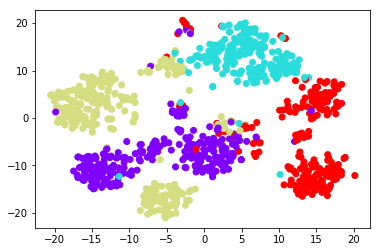

In [9]:
plt.scatter(x_bhtsne[:,0],x_bhtsne[:,1],c=kmeans.labels_,cmap='rainbow')

In [37]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.plotly as py
import plotly.graph_objs as go
print(__version__) # requires version >= 1.9.0
import cufflinks as cf
init_notebook_mode(connected=True)
cf.go_offline()

2.0.11


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [38]:
trace1 = go.Scatter3d(
    x=x_pca[:,0],
    y=x_pca[:,1],
    z=x_pca[:,2],
    mode='markers',
    marker=dict(
        size=12,
        color=kmeans.labels_,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)

da = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0
    )
)
fig = go.Figure(data=da, layout=layout)
cf.iplot(fig, filename='3d-scatter-colorscale')